Import Required Libraries

In [ ]:
import pandas as pd
import csv
import numpy as np
!pip install causal-learn
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils
import nltk
import string

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 172 kB 9.0 MB/s 


Import Stopwords, and Stemming

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
def implement_stemmer(token):
    sno = nltk.stem.SnowballStemmer('english')
    return sno.stem(token)

stopwords = stopwords.words('english')
# stopwords = [implement_stemmer(word) for word in stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
len(df)

6528

Get most frequent words as dictionary

In [ ]:
def calculateBOW(l_doc):
  tf_diz = dict.fromkeys(dict_words,0)  
  for word in l_doc.split():
    word=implement_stemmer(word)
    # if word=='realli'
    if word in tf_diz:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

In [ ]:
df['bow']=df.clean_sentence.apply(calculateBOW)
df = df.join(pd.json_normalize(df.bow))
df=df.fillna(0)

In [ ]:
dict_words=sorted(word_dict, key=word_dict.get, reverse=True)[:100]

In [ ]:
dict_words

['one',
 'game',
 'like',
 'vote',
 'year',
 'black',
 'get',
 'elon',
 'amp',
 'peopl',
 'musk',
 'data',
 'direct',
 'live',
 'home',
 'scienc',
 'twitter',
 'time',
 'ovid',
 'aveng',
 'trump',
 'say',
 'ariana',
 'grand',
 'squid',
 'matter',
 'taylor',
 'stay',
 'know',
 'swift',
 'make',
 'nugget',
 'dont',
 'endgam',
 'throne',
 'breit',
 'gate',
 'think',
 'bill',
 'would',
 'love',
 'bts',
 'biden',
 'everyon',
 'wendi',
 'dress',
 'chadwick',
 'want',
 'corona',
 'day',
 'obama',
 'bitcoin',
 'becaus',
 'onli',
 'liter',
 'joe',
 'donald',
 'work',
 'look',
 'new',
 'got',
 'good',
 'use',
 'right',
 'see',
 'armi',
 'tesla',
 'need',
 'way',
 'whi',
 'war',
 'watch',
 'hello',
 'back',
 'first',
 'boseman',
 'ama',
 'go',
 'thing',
 'take',
 'even',
 'show',
 'man',
 'today',
 'said',
 'still',
 'never',
 'much',
 'ist',
 'olymp',
 'come',
 'write',
 'also',
 'tri',
 'ani',
 'realli',
 'world',
 'thank',
 'rio',
 'let']

In [ ]:
df.columns

Index(['Unnamed: 0', 'clean', 'content', 'tokenize1', 'ID', 'AUTHOR',
       'RETWEET', 'LIKES', 'QUOTE COUNT', 'REPLY COUNT', 'emojis', 'len',
       'num_mentions', 'num_hashtags', 'num_links', 'JJ', 'NN', 'VBD', 'RB',
       'IN', 'NNS', 'DT', 'VB', 'CC', 'VBG', 'PRP', 'VBP', 'VBZ', 'VBN',
       'clean_sentence', 'sentiment'],
      dtype='object')

In [ ]:
df1=df[['RETWEET','emojis', 'len','QUOTE COUNT','num_mentions', 'REPLY COUNT','num_hashtags', 'num_links', 'JJ', 'NN', 'VBD', 'RB',
       'IN', 'NNS', 'DT', 'VB', 'CC', 'VBG', 'PRP', 'VBP', 'VBZ', 'VBN', 'sentiment']]

Dataframe with bag of words

In [ ]:
df1=df[['RETWEET','emojis','QUOTE COUNT','REPLY COUNT','len','num_mentions', 'num_hashtags', 'num_links', 'JJ', 'NN', 'VBD', 'RB',
       'IN', 'NNS', 'DT', 'VB', 'CC', 'VBG', 'PRP', 'VBP', 'VBZ', 'VBN', 'sentiment','one', 'game', 'like', 'vote', 'year', 'black',
        'get', 'elon', 'amp', 'peopl', 'musk', 'data', 'direct', 'live', 'home', 'scienc', 'twitter', 'time', 'ovid', 'aveng', 'trump', 
        'say', 'ariana', 'grand', 'squid', 'matter', 'taylor', 'stay', 'know', 'swift', 'make', 'nugget', 'dont', 'endgam', 'throne', 'breit', 
        'gate', 'think', 'bill', 'would', 'love', 'bts', 'biden', 'everyon', 'wendi', 'dress', 'chadwick', 'want', 'corona', 'day', 'obama', 'bitcoin', 
        'becaus', 'onli', 'liter', 'joe', 'donald', 'work', 'look', 'new', 'got', 'good', 'use', 'right', 'see', 'armi', 'tesla', 'need', 'way', 'whi', 'war', 
        'watch', 'hello', 'back', 'first', 'boseman', 'ama', 'go', 'thing', 'take', 'even', 'show', 'man', 'today', 'said', 'still', 'never', 'much', 'ist', 'olymp', 
        'come', 'write', 'also', 'tri', 'ani', 'realli', 'world', 'thank', 'rio', 'let']]

In [ ]:
df1=df[['LIKES','QUOTE COUNT','REPLY COUNT','emojis', 'len','num_mentions', 'num_hashtags', 'num_links', 'NN', 'VBD','sentiment','one', 'game','vote', 'year', 'black',
         'elon','musk', 'data', 'direct', 'live', 'home', 'scienc', 'twitter','ovid', 'aveng', 'trump', 
         'ariana', 'grand', 'squid', 'matter', 'taylor', 'stay', 'swift', 'nugget', 'throne', 'breit', 
         'think', 'bill', 'love', 'bts', 'biden', 'everyon','dress', 'chadwick', 'corona','obama', 'bitcoin', 
         'joe', 'donald', 'work', 'look', 'new', 'got', 'good', 'right', 'tesla','war', 
         'hello', 'back', 'first', 'boseman','man', 'never','olymp', 
        'world', 'thank', 'rio']]

In [ ]:
from sklearn.preprocessing import scale
df1[:] = scale(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [ ]:
df1.describe()

,RETWEET,emojis,len,QUOTE COUNT,num_mentions,REPLY COUNT,num_hashtags,num_links,JJ,NN,...,NNS,DT,VB,CC,VBG,PRP,VBP,VBZ,VBN,sentiment
count,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,...,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000
mean,10.452512,0.373315,141.328585,1.796415,1.172947,2.589461,0.657169,0.480086,2.167892,5.696998,...,1.508119,1.337163,0.586857,0.588235,0.609222,0.426471,0.942862,0.388021,0.400276,0.068265
std,174.092377,1.220656,83.911192,60.492882,3.692396,34.721792,2.130518,0.648791,1.933235,3.644848,...,1.534425,1.466907,0.871449,0.859805,0.902656,0.830762,1.142631,0.666351,0.733020,0.476018
min,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.986400
25%,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.231075
50%,0.000000,0.000000,122.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,5.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,214.250000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,8.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.440400
max,8560.000000,24.000000,305.000000,4631.000000,50.000000,1389.000000,25.000000,7.000000,13.000000,28.000000,...,14.000000,9.000000,8.000000,5.000000,7.000000,8.000000,9.000000,6.000000,5.000000,0.982700


In [ ]:
df1.corr()

,LIKES,emojis,len,num_mentions,num_hashtags,num_links,JJ,NN,VBD,RB,...,hello,back,first,boseman,man,never,olymp,world,thank,rio
LIKES,1.000000,-0.015053,-0.001857,-0.017760,-0.008992,0.019626,0.016190,-0.003772,-0.005135,-0.002742,...,-0.006969,0.036847,0.007478,0.051129,-0.005734,-0.005800,-0.005933,-0.005797,-0.004294,-0.005404
emojis,-0.015053,1.000000,0.026813,0.070009,0.091696,0.094027,0.041412,0.082420,-0.028904,-0.004187,...,0.029320,-0.020863,-0.006602,0.003429,-0.003161,-0.017230,0.006928,0.004961,0.004977,0.009945
len,-0.001857,0.026813,1.000000,0.032030,0.117670,-0.019114,0.695414,0.718236,0.448844,0.520460,...,0.040903,0.063664,0.047881,-0.000012,0.025208,0.048182,0.054869,0.060988,0.011101,0.043285
num_mentions,-0.017760,0.070009,0.032030,1.000000,-0.020409,-0.081224,0.024499,-0.021504,0.016120,0.023360,...,-0.023494,0.004412,-0.010354,-0.022180,-0.015771,-0.011847,-0.004147,0.019203,0.004517,-0.006547
num_hashtags,-0.008992,0.091696,0.117670,-0.020409,1.000000,0.220287,0.171881,0.323941,-0.083595,-0.100990,...,-0.021009,-0.019180,-0.011092,-0.013112,-0.012472,-0.018320,-0.022377,0.004720,-0.002532,-0.022672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
never,-0.005800,-0.017230,0.048182,-0.011847,-0.018320,-0.028033,0.008907,-0.001761,0.011300,0.092374,...,-0.023389,0.018431,-0.013682,-0.018969,0.001554,1.000000,0.012391,0.002934,-0.002856,0.017129
olymp,-0.005933,0.006928,0.054869,-0.004147,-0.022377,0.032015,-0.003652,0.026471,0.069558,0.038115,...,-0.023172,-0.023842,0.040948,-0.024229,-0.007228,0.012391,1.000000,0.092128,-0.021341,0.884414
world,-0.005797,0.004961,0.060988,0.019203,0.004720,0.023724,0.043063,0.055525,0.024454,0.007384,...,-0.016519,-0.011519,0.022065,-0.011523,0.008231,0.002934,0.092128,1.000000,-0.013694,0.106800
thank,-0.004294,0.004977,0.011101,0.004517,-0.002532,-0.012777,-0.013033,0.011974,-0.015625,0.004276,...,0.066546,-0.000263,0.023406,-0.011718,-0.020013,-0.002856,-0.021341,-0.013694,1.000000,-0.021010


In [ ]:
from IPython.display import Image,display
def view_pydot(pdot):
  plt=Image(pdot.create_png())
  display(plt)

In [ ]:
G=fci(df1.to_numpy())

Starting Fast Adjacency Search.


  0%|          | 0/23 [00:00<?, ?it/s]

Finishing Fast Adjacency Search.
X3 --> X9
X3 --> X15
X16 --> X3
X5 --> X8
X11 --> X22
X12 --> X15
X13 --> X16
X20 --> X14
X17 --> X16
X18 --> X22
X20 --> X19


In [ ]:
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
from causallearn.utils.PCUtils.BackgroundKnowledgeOrientUtils import orient_by_background_knowledge

In [ ]:
nodes = fci.G.get_nodes()

assert fci.G.is_directed_from_to(nodes[0], nodes[3])
assert fci.G.is_directed_from_to(nodes[0], nodes[12])

bk = BackgroundKnowledge() \
    .add_forbidden_by_node(nodes[0], nodes[3]) \
    .add_forbidden_by_node(nodes[3], nodes[0]) \
    .add_required_by_node(nodes[7], nodes[17])
cg_with_background_knowledge = pc(data, 0.05, mv_fisherz, True, 0, 0, mvpc=True, background_knowledge=bk)

assert cg_with_background_knowledge.G.get_edge(nodes[0], nodes[3]) is None
assert cg_with_background_knowledge.G.is_directed_from_to(nodes[0], nodes[12])

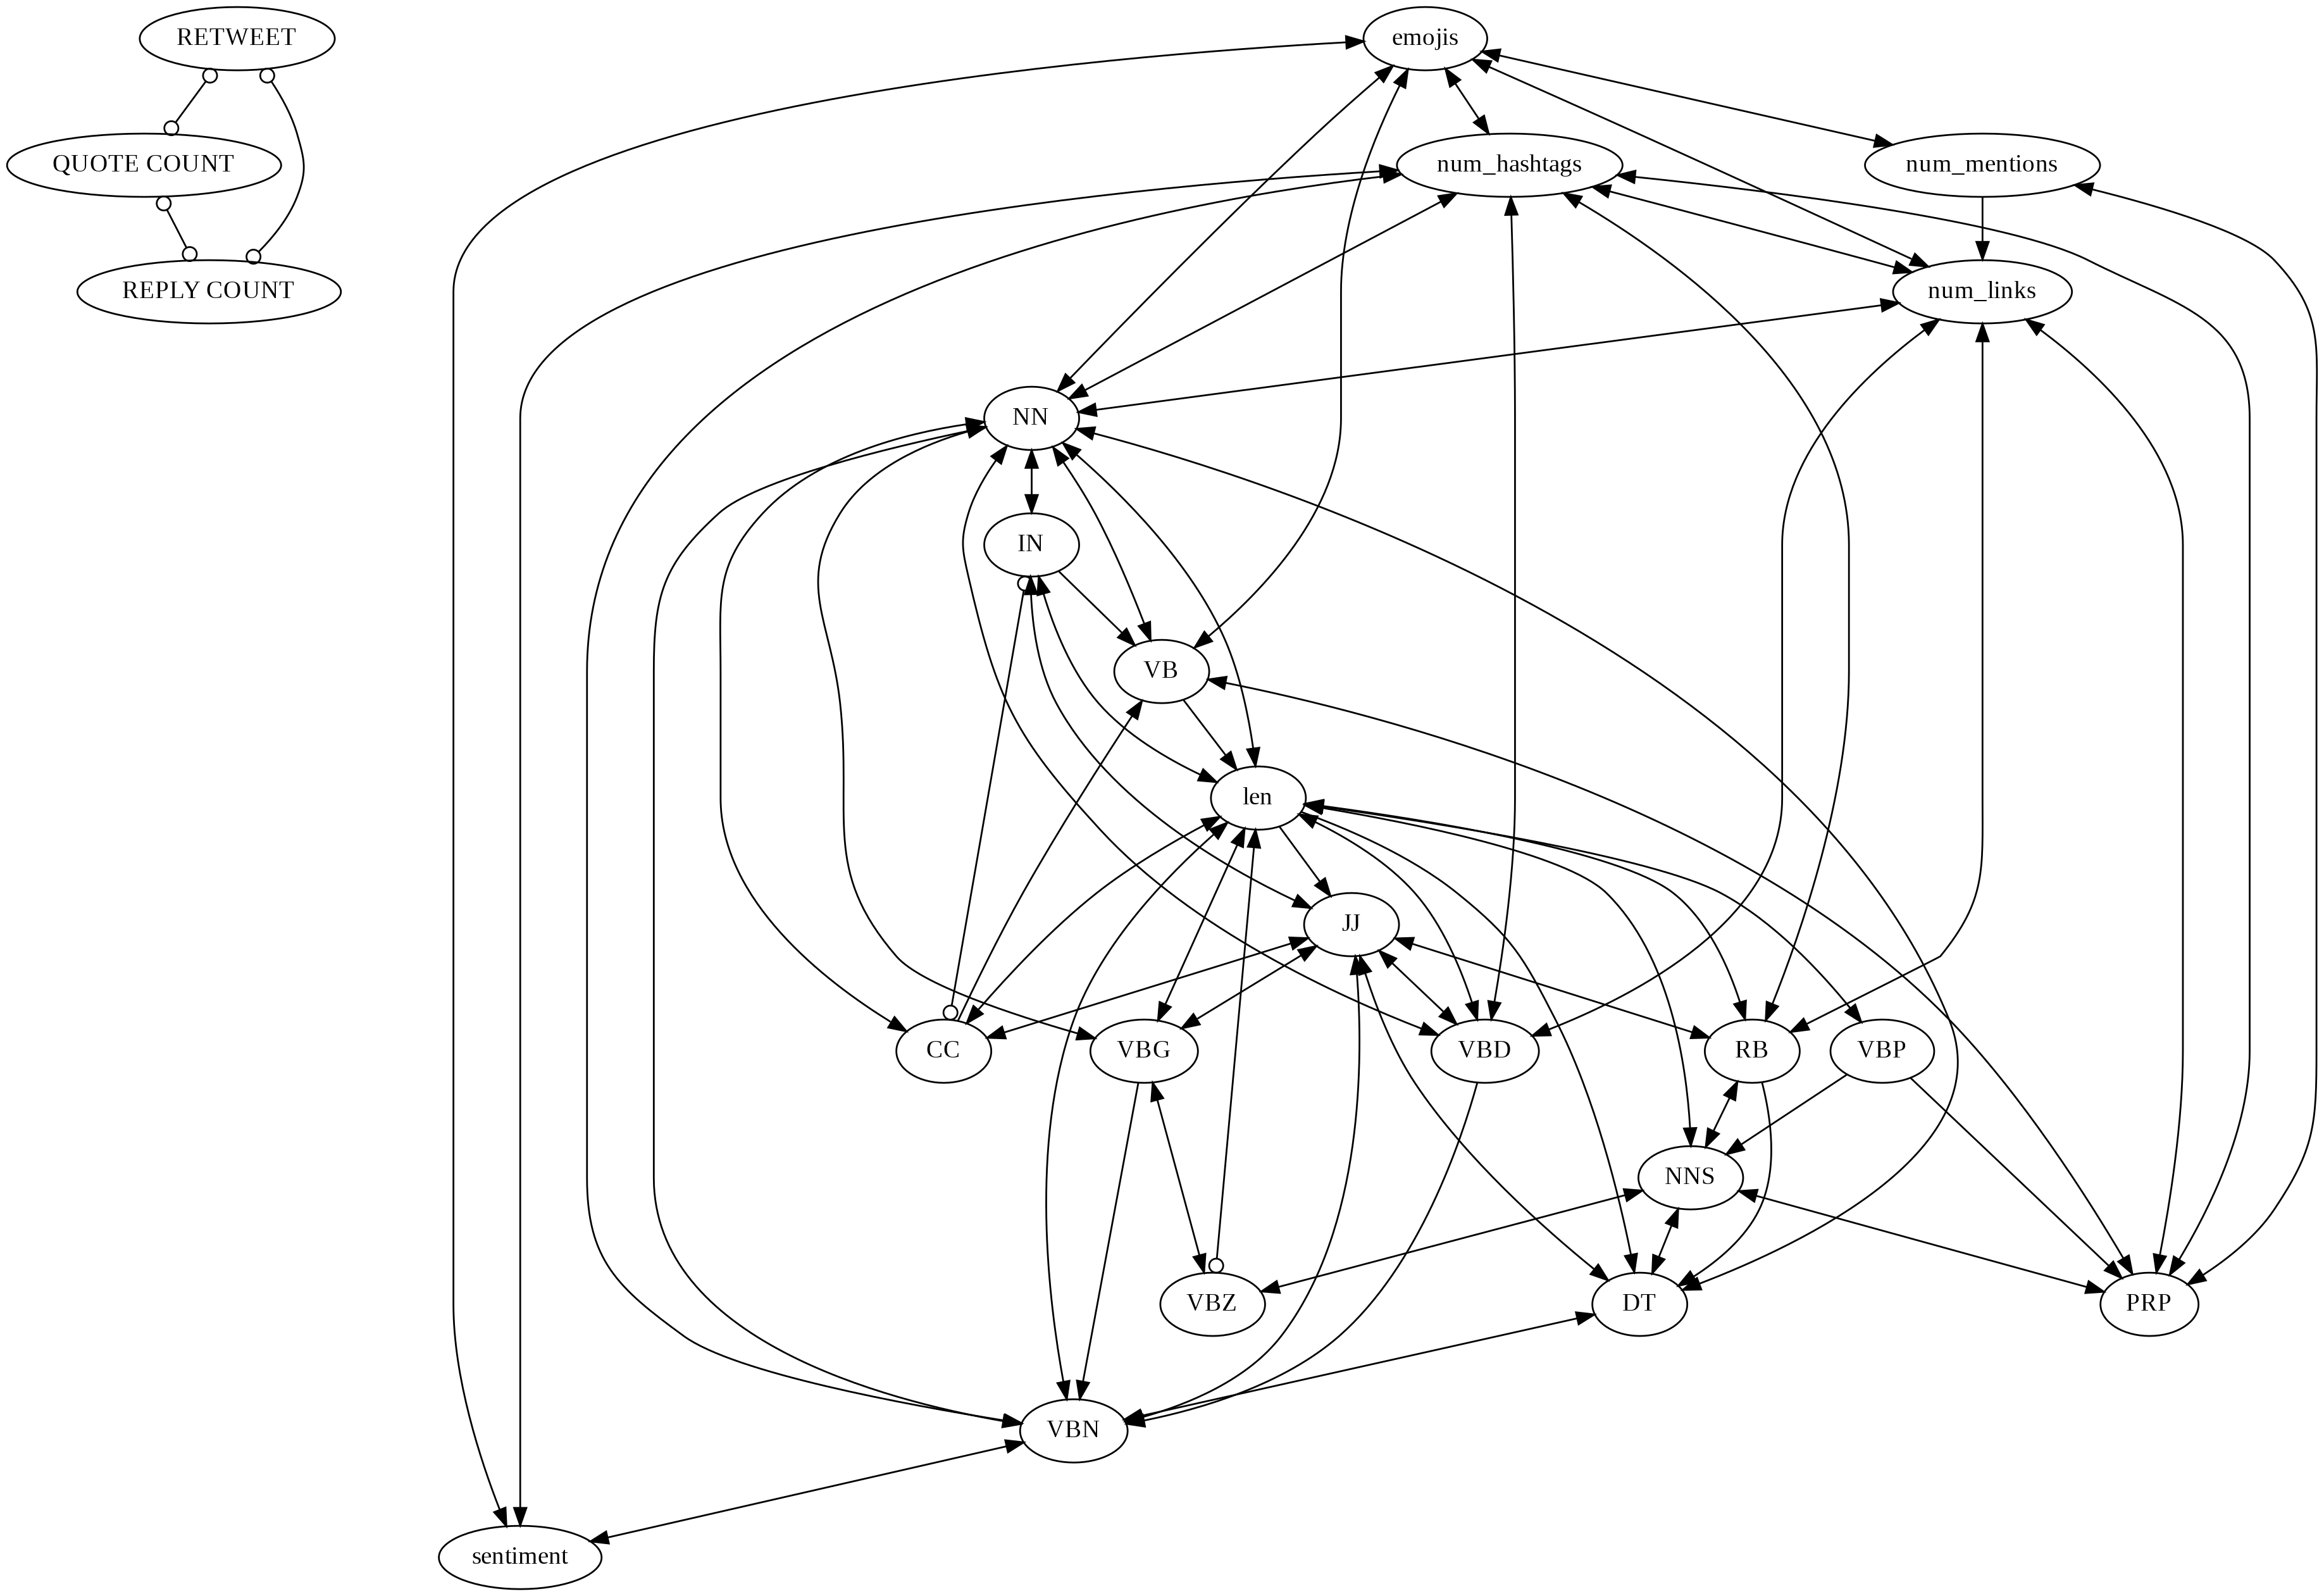

In [ ]:
dot=GraphUtils.to_pydot(G[0],labels=df1.columns)
view_pydot(dot)

  0%|          | 0/23 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
2 dep 14 | (9, 10, 11, 13, 15, 16, 17, 20, 21) with p-value 0.000000

2 dep 14 | (9, 10, 11, 13, 15, 16, 19, 20, 21) with p-value 0.000000

2 dep 14 | (9, 10, 11, 13, 15, 17, 19, 20, 21) with p-value 0.000000

2 dep 14 | (9, 10, 11, 13, 16, 17, 19, 20, 21) with p-value 0.000000

2 dep 14 | (9, 10, 11, 15, 16, 17, 19, 20, 21) with p-value 0.000000

2 dep 14 | (9, 10, 12, 13, 15, 16, 17, 19, 20) with p-value 0.000000

2 dep 14 | (9, 10, 12, 13, 15, 16, 17, 19, 21) with p-value 0.000000

2 dep 14 | (9, 10, 12, 13, 15, 16, 17, 20, 21) with p-value 0.000000

2 dep 14 | (9, 10, 12, 13, 15, 16, 19, 20, 21) with p-value 0.000000

2 dep 14 | (9, 10, 12, 13, 15, 17, 19, 20, 21) with p-value 0.000000

2 dep 14 | (9, 10, 12, 13, 16, 17, 19, 20, 21) with p-value 0.000000

2 dep 14 | (9, 10, 12, 15, 16, 17, 19, 20, 21) with p-value 0.000000

2 dep 14 | (9, 10, 13, 15, 16, 17, 19, 20, 21) with p-value 0.000000

2 dep 14 | (9, 11, 12, 13, 15, 16, 17, 

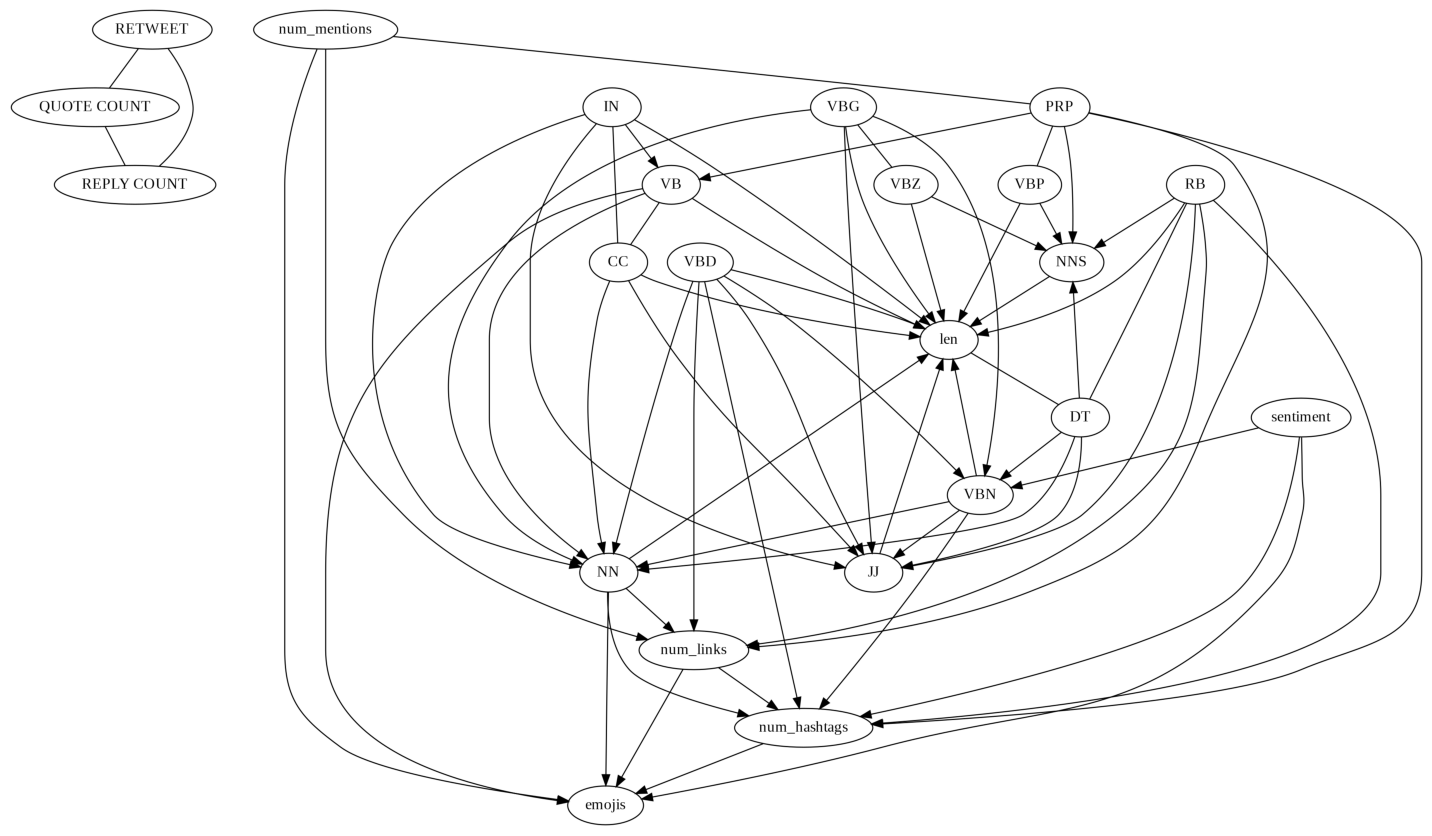

In [ ]:
from causallearn.search.ConstraintBased.PC import pc
cg=pc(df1.to_numpy(),verbose=True)
cg.draw_pydot_graph(labels=df1.columns)